<a href="https://colab.research.google.com/github/vedantsawant/CSE512-ML-Project/blob/main/RockPaperScissors%20Architecture5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import zipfile  
from tensorflow.keras import regularizers

In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip

!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip

--2022-11-28 06:41:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 142.250.4.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  22.9MB/s    in 9.6s    

2022-11-28 06:41:53 (20.0 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2022-11-28 06:41:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 142.250.4.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zip’

In [ ]:
zip_ref_train = zipfile.ZipFile('/content/rps.zip')
zip_ref_train.extractall()
zip_ref_train.close()

zip_ref_test = zipfile.ZipFile('/content/rps-test-set.zip')
zip_ref_test.extractall()
zip_ref_test.close()

In [ ]:
train_dir = '/content/rps'
test_dir = '/content/rps-test-set'

train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock') 
train_scissors_dir = os.path.join(train_dir, 'scissors')

test_paper_dir = os.path.join(test_dir, 'paper')
test_rock_dir = os.path.join(test_dir, 'rock') 
test_scissors_dir = os.path.join(test_dir, 'scissors')

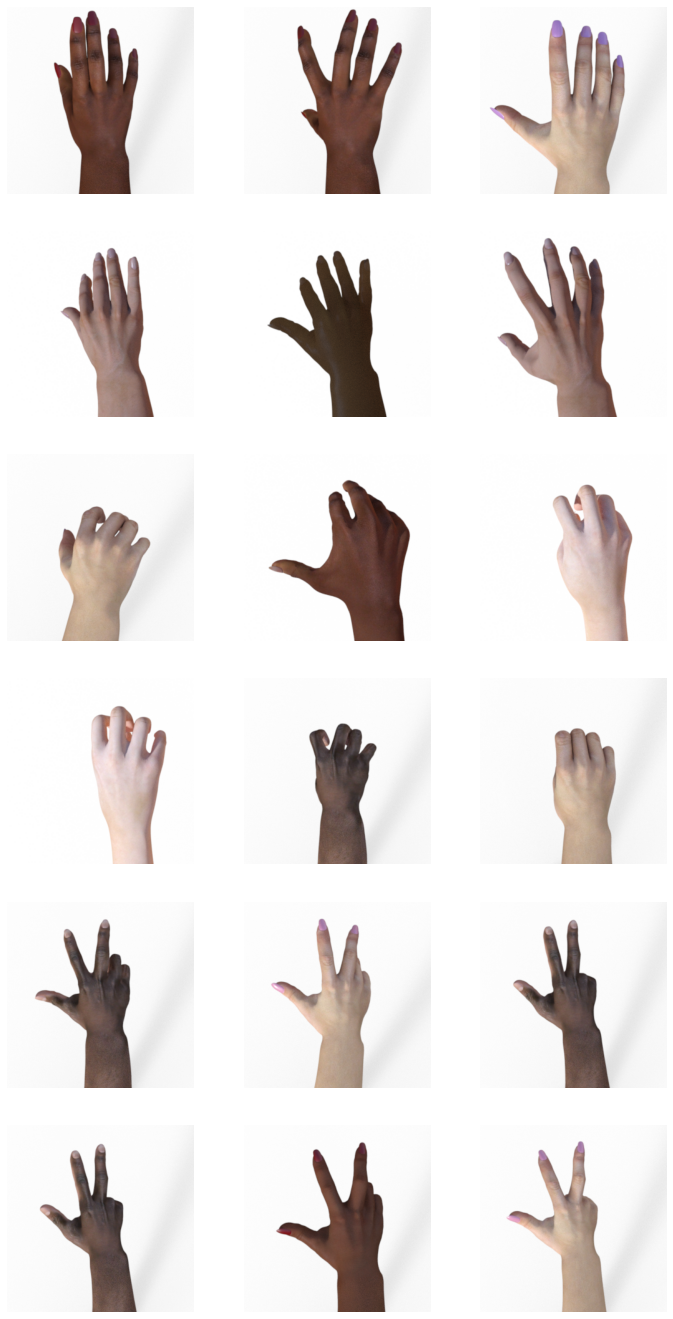

In [ ]:
ncols = 6
nrows = 3
index = 0

fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)

index += 6
next_paper_pix = [os.path.join(train_paper_dir, fname) for fname in os.listdir(train_paper_dir)[index-6 : index]]
next_rock_pix = [os.path.join(train_rock_dir, fname) for fname in os.listdir(train_rock_dir)[index-6 : index]]
next_scissors_pix = [os.path.join(train_scissors_dir, fname) for fname in os.listdir(train_scissors_dir)[index-6 : index]]

for i, img_path in enumerate(next_paper_pix+next_rock_pix+next_scissors_pix):
  sp = plt.subplot(ncols, nrows, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

In [ ]:
print(len(os.listdir(train_paper_dir))+len(os.listdir(train_rock_dir))+len(os.listdir(train_scissors_dir)))
print(len(os.listdir(test_paper_dir))+len(os.listdir(test_rock_dir))+len(os.listdir(test_scissors_dir)))

2520
372


### Base Model

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 19s 875ms/step - loss: 1.0877 - accuracy: 0.3730 - val_loss: 1.0478 - val_accuracy: 0.5977
Epoch 2/50
8/8 [==============================] - 6s 774ms/step - loss: 0.9808 - accuracy: 0.5449 - val_loss: 1.0048 - val_accuracy: 0.5859
Epoch 3/50
8/8 [==============================] - 7s 941ms/step - loss: 0.6389 - accuracy: 0.7510 - val_loss: 0.9279 - val_accuracy: 0.6953
Epoch 4/50
8/8 [==============================] - 6s 719ms/step - loss: 0.2840 - accuracy: 0.9024 - val_loss: 0.6939 - val_accuracy: 0.7188
Epoch 5/50
8/8 [==============================] - 6s 759ms/step - loss: 0.1126 - accuracy: 0.9639 - val_loss: 1.0446 - val_accuracy: 0.7891
Epoch 6/50
8/8 [==============================] - 6s 748ms/step - loss: 0.0400 - accuracy: 0.9912 - val_loss: 0.7924 - val_accuracy: 0.8633
Epoch 7/50
8/8 [==============================] - 6s 769ms/step - loss: 0.0118 - accuracy: 0.9951 - val_loss: 1.0217 - val_accuracy: 0.8359
Epoch 8/50
8/8 [===

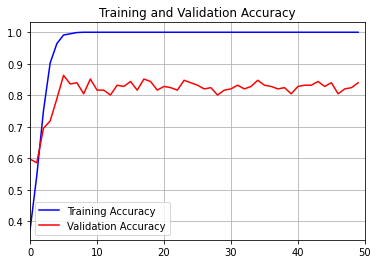

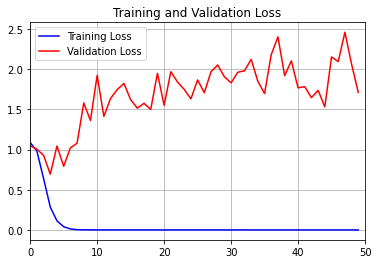

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

### L1 Regularization

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1(l=0.01)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1(l=0.01)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                            #  tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                            #  tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 35, 35, 64)      

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 7s 803ms/step - loss: 10.7302 - accuracy: 0.3643 - val_loss: 9.7495 - val_accuracy: 0.3359
Epoch 2/50
8/8 [==============================] - 6s 718ms/step - loss: 9.0205 - accuracy: 0.6016 - val_loss: 8.1984 - val_accuracy: 0.5273
Epoch 3/50
8/8 [==============================] - 6s 719ms/step - loss: 7.7273 - accuracy: 0.5030 - val_loss: 7.1584 - val_accuracy: 0.4609
Epoch 4/50
8/8 [==============================] - 6s 719ms/step - loss: 6.4200 - accuracy: 0.6768 - val_loss: 6.1265 - val_accuracy: 0.5742
Epoch 5/50
8/8 [==============================] - 6s 743ms/step - loss: 5.2249 - accuracy: 0.8057 - val_loss: 5.2656 - val_accuracy: 0.5820
Epoch 6/50
8/8 [==============================] - 6s 739ms/step - loss: 4.2769 - accuracy: 0.8613 - val_loss: 4.7224 - val_accuracy: 0.6484
Epoch 7/50
8/8 [==============================] - 6s 740ms/step - loss: 3.4782 - accuracy: 0.9092 - val_loss: 3.9978 - val_accuracy: 0.6680
Epoch 8/50
8/8 [===

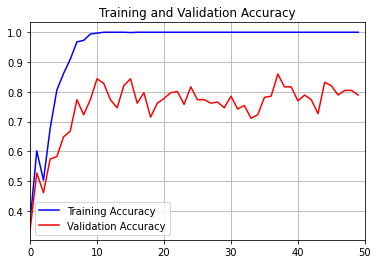

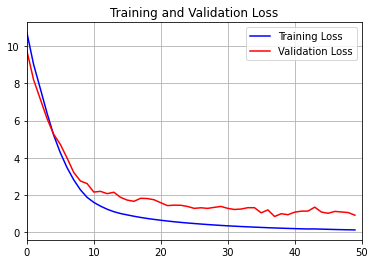

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

In [ ]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

### L2 Regularization

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(l=0.01)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(l=0.01)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                            #  tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                            #  tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 7s 773ms/step - loss: 1.7334 - accuracy: 0.3350 - val_loss: 1.6124 - val_accuracy: 0.5156
Epoch 2/50
8/8 [==============================] - 6s 701ms/step - loss: 1.4881 - accuracy: 0.6138 - val_loss: 1.2953 - val_accuracy: 0.5781
Epoch 3/50
8/8 [==============================] - 6s 715ms/step - loss: 1.1197 - accuracy: 0.6687 - val_loss: 1.2045 - val_accuracy: 0.5820
Epoch 4/50
8/8 [==============================] - 6s 705ms/step - loss: 0.7878 - accuracy: 0.8415 - val_loss: 1.7336 - val_accuracy: 0.5703
Epoch 5/50
8/8 [==============================] - 6s 734ms/step - loss: 0.7645 - accuracy: 0.8369 - val_loss: 1.0155 - val_accuracy: 0.7383
Epoch 6/50
8/8 [==============================] - 6s 698ms/step - loss: 0.4770 - accuracy: 0.9248 - val_loss: 1.5001 - val_accuracy: 0.7109
Epoch 7/50
8/8 [==============================] - 6s 722ms/step - loss: 0.3283 - accuracy: 0.9834 - val_loss: 1.9525 - val_accuracy: 0.6094
Epoch 8/50
8/8 [====

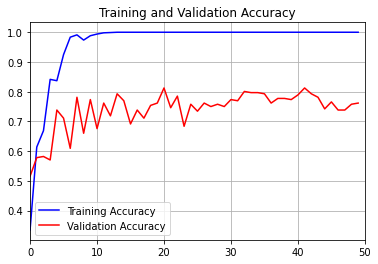

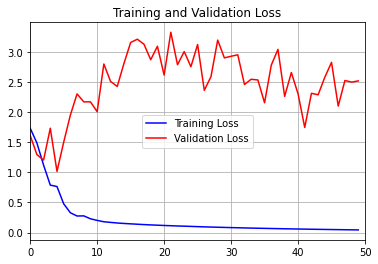

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

### Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                            #  tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                            #  tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 23s 3s/step - loss: 1.1467 - accuracy: 0.3232 - val_loss: 1.0986 - val_accuracy: 0.3398
Epoch 2/50
8/8 [==============================] - 23s 3s/step - loss: 1.0982 - accuracy: 0.3730 - val_loss: 1.0932 - val_accuracy: 0.5742
Epoch 3/50
8/8 [==============================] - 21s 3s/step - loss: 1.0877 - accuracy: 0.3780 - val_loss: 1.0353 - val_accuracy: 0.6211
Epoch 4/50
8/8 [==============================] - 21s 3s/step - loss: 1.0412 - accuracy: 0.4644 - val_loss: 1.0284 - val_accuracy: 0.6016
Epoch 5/50
8/8 [==============================] - 22s 3s/step - loss: 0.9891 - accuracy: 0.4941 - val_loss: 0.6848 - val_accuracy: 0.5977
Epoch 6/50
8/8 [==============================] - 22s 3s/step - loss: 0.9072 - accuracy: 0.5674 - val_loss: 0.7220 - val_accuracy: 0.7266
Epoch 7/50
8/8 [==============================] - 22s 3s/step - loss: 0.8034 - accuracy: 0.6367 - val_loss: 0.4934 - val_accuracy: 0.7617
Epoch 8/50
8/8 [==================

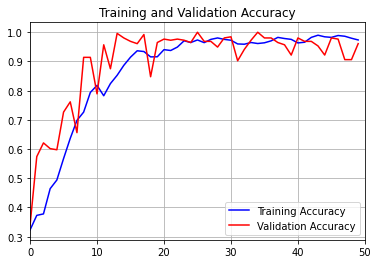

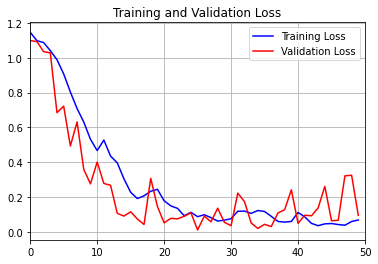

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

### Dropout

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 6s 757ms/step - loss: 1.1132 - accuracy: 0.4045 - val_loss: 1.0978 - val_accuracy: 0.3320
Epoch 2/50
8/8 [==============================] - 6s 708ms/step - loss: 1.0596 - accuracy: 0.4736 - val_loss: 1.0153 - val_accuracy: 0.3945
Epoch 3/50
8/8 [==============================] - 6s 690ms/step - loss: 0.6569 - accuracy: 0.7124 - val_loss: 0.8600 - val_accuracy: 0.6367
Epoch 4/50
8/8 [==============================] - 6s 695ms/step - loss: 0.3607 - accuracy: 0.8496 - val_loss: 1.2336 - val_accuracy: 0.6836
Epoch 5/50
8/8 [==============================] - 6s 697ms/step - loss: 0.1731 - accuracy: 0.9461 - val_loss: 0.8436 - val_accuracy: 0.7891
Epoch 6/50
8/8 [==============================] - 6s 718ms/step - loss: 0.0831 - accuracy: 0.9814 - val_loss: 1.1688 - val_accuracy: 0.7578
Epoch 7/50
8/8 [==============================] - 6s 714ms/step - loss: 0.0229 - accuracy: 0.9932 - val_loss: 1.3207 - val_accuracy: 0.8594
Epoch 8/50
8/8 [====

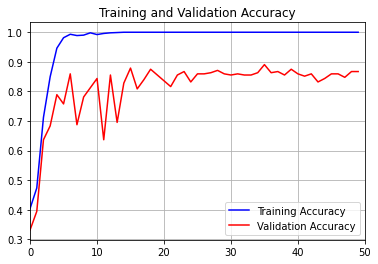

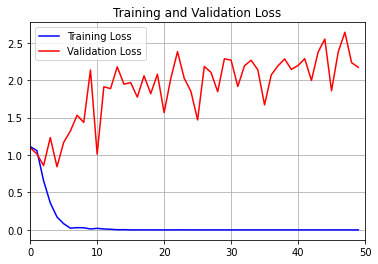

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

###DropConnect

When training with Dropout, a randomly selected subset of activations are set to zero within each layer.

In [ ]:
!pip install dropconnect-tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for dropconnect-tensorflow: filename=dropconnect_tensorflow-0.1.1-py3-none-any.whl size=4659 sha256=b6bfe7f371798d76e9fa7e8f5c900dbf3daa67642707379afb7f8ea436f26220
  Stored in directory: /root/.cache/pip/wheels/b3/01/96/2463fe99c7de6dcdd3b28e6ecdafa4081709eb38b1a446d4dd
Successfully built dropconnect-tensorflow


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
from dropconnect_tensorflow import DropConnectDense

model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             DropConnectDense(units=64, prob=0.2, activation="relu", use_bias=True),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 14s 1s/step - loss: 1.1009 - accuracy: 0.3613 - val_loss: 1.0870 - val_accuracy: 0.3359
Epoch 2/50
8/8 [==============================] - 6s 715ms/step - loss: 0.9232 - accuracy: 0.5285 - val_loss: 1.0491 - val_accuracy: 0.5820
Epoch 3/50
8/8 [==============================] - 6s 688ms/step - loss: 0.7635 - accuracy: 0.6372 - val_loss: 0.7985 - val_accuracy: 0.7539
Epoch 4/50
8/8 [==============================] - 6s 697ms/step - loss: 0.3972 - accuracy: 0.8242 - val_loss: 1.1859 - val_accuracy: 0.7188
Epoch 5/50
8/8 [==============================] - 6s 710ms/step - loss: 0.2871 - accuracy: 0.8791 - val_loss: 2.0122 - val_accuracy: 0.5664
Epoch 6/50
8/8 [==============================] - 6s 692ms/step - loss: 0.1872 - accuracy: 0.9533 - val_loss: 0.8279 - val_accuracy: 0.8984
Epoch 7/50
8/8 [==============================] - 6s 695ms/step - loss: 0.0810 - accuracy: 0.9848 - val_loss: 1.0801 - val_accuracy: 0.8477
Epoch 8/50
8/8 [======

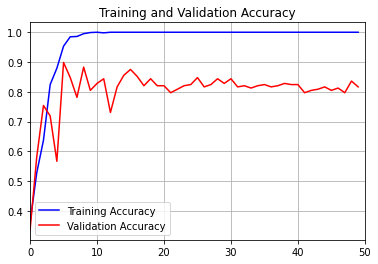

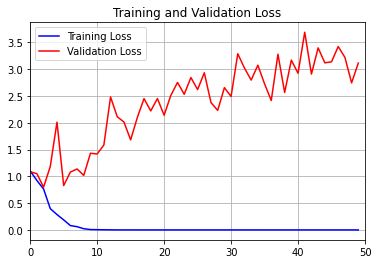

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()